In [2]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print("Python : {}".format(sys.version))
print("Numpy : {}".format(numpy.__version__))
print("Matplotlib : {}".format(matplotlib.__version__))
print("Pandas : {}".format(pandas.__version__))
print("SKLearn : {}".format(sklearn.__version__))

Python : 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy : 1.14.3
Matplotlib : 2.2.2
Pandas : 0.23.0
SKLearn : 0.19.1


In [3]:
import numpy as np
from sklearn import cross_validation,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


C:\Users\binod\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# loading the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = [ "id", "clump_thickness", "unifrom_cell_size", "unifrom_cell_shape",
        "marginal_adhesion", "single_epithelial_size", "bare_nuclei", 
        "bland_chromatin", "normal_nucleoli", "mitoses", "class" ]
df = pd.read_csv(url,names=names)

In [5]:
# Preprocess the data

df.replace('?' , -99999 , inplace=True)
print(df.axes)

df.drop(['id'] , 1 , inplace=True)

print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'unifrom_cell_size', 'unifrom_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


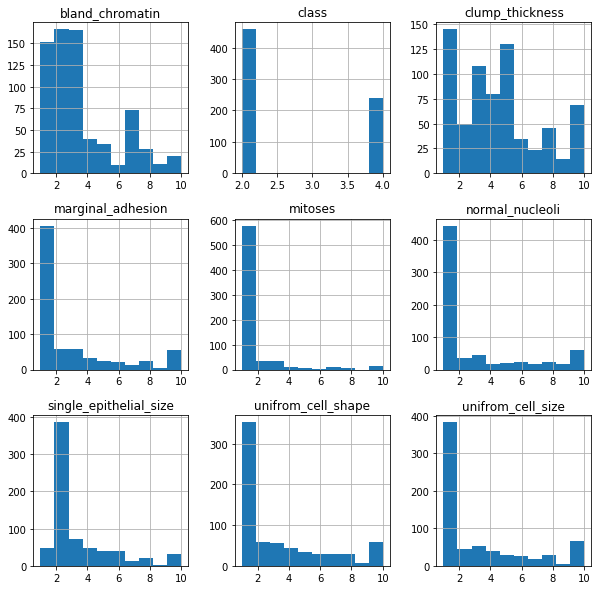

In [6]:
# plot histogram for each variable
df.hist(figsize = (10,10))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

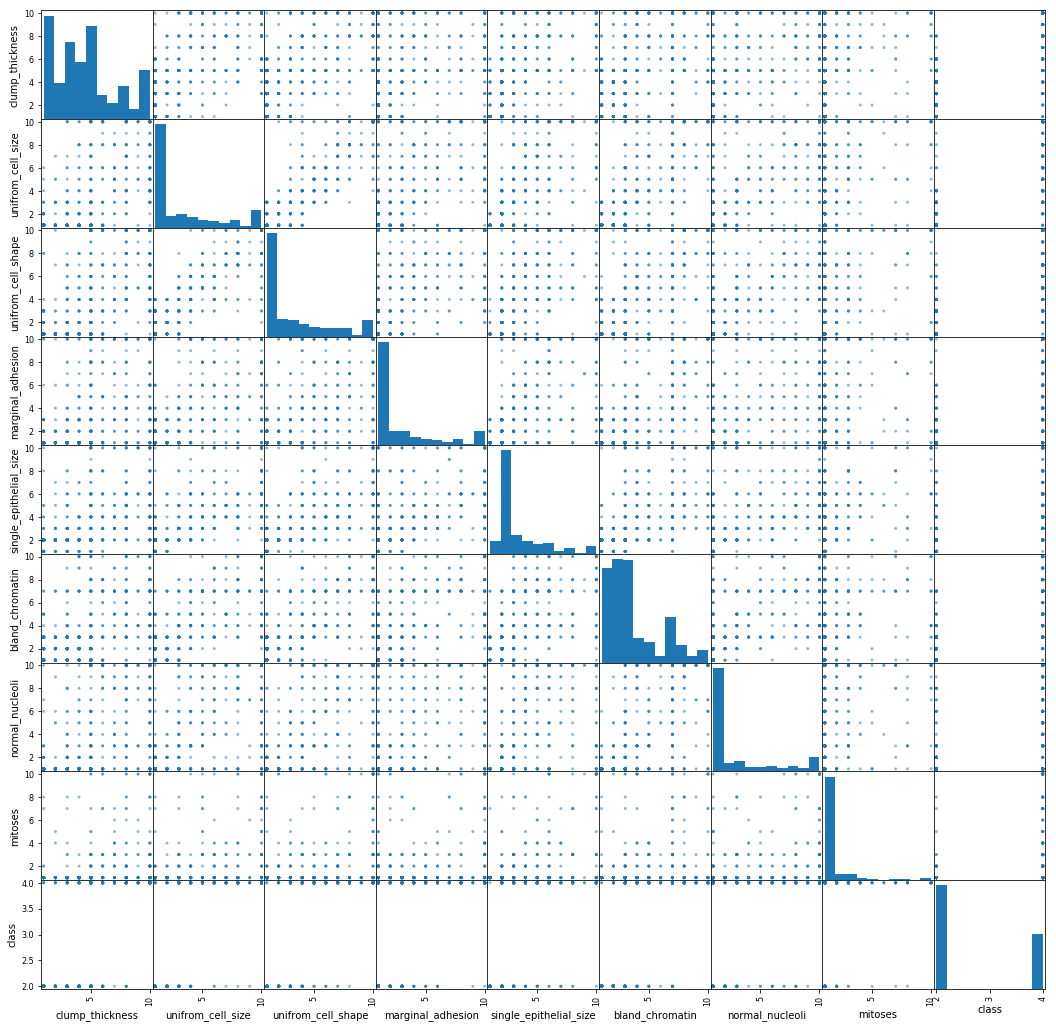

In [7]:
# Create scatter plot matrix
scatter_matrix(df, figsize=(18,18))
plt.show

In [8]:
# Create Feature matrix and Output vector for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train,X_test,y_train,y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [9]:
# Specify testing options

seed = 8
scoring = 'accuracy'

In [12]:
# Define models

Models = []
Models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
Models.append(('SVM', SVC()))

# Evaluate each model in turn

results = []
names = []

for name, model in Models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = " %s: %f (%f) " %(name, cv_results.mean(), cv_results.std())
    print(msg)

 KNN: 0.969643 (0.028849) 
 SVM: 0.964253 (0.013790) 
